In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Data Cleaning and Exploitation

In [2]:
data =pd.read_csv('case_study_devdata.csv')

In [3]:
data

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,0,0,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,0,0,...,NaN,NaN,20184.797410,28980.688820,33703.922700,56910.018420,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,44367258,3976.37,GOVINDSAMY BASKARAN,IN,0,Fuel,22.0,150000.0,0,0,...,NaN,1783657.0,46481.095190,54441.174710,37003.745800,98999.267820,-0.023032,1.675239,-0.755055,Affluent_Card
49996,46280982,5097.50,PAYTM RENTAL,IN,0,Rent Payments,24.0,25000.0,0,0,...,NaN,166702.0,275.632222,1705.884118,1770.551609,3321.264392,-0.900393,-0.068999,-0.621572,Mass_Card
49997,46265583,26485.00,BAJAJALLIANZ BILLD,IN,0,Insurance,9.0,281000.0,0,0,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card
49998,44535212,2570.00,DR BS YADAV KIDS CURE,IN,0,Medical,9.0,281000.0,0,0,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


 **There are several columns which contains transactions and expenses in different-different fields so i will combine them**

In [5]:
data['No. of tras. in 1 month']=data.iloc[:,8:42].sum(axis=1)
data['No. of tras. in 1 month'].head()

0    8
1    3
2    9
3    9
4    9
Name: No. of tras. in 1 month, dtype: int64

In [6]:
# you can see there are several columns for 1,3,6 and 12 month transaction, so i will be clubing these columns to get more clean data.
data.iloc[:,8:43]

,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,Hotels_1m,Railways_1m,Airports_1m,Utility_1m,Retail_1m,...,DirectM_1m,Cash_1m,QuasiCash_1m,FS_1m,RentPayments_1m,WalletLoad_1m,BusinessServ_1m,ProfServ_1m,Education_1m,GovtServices_1m
0,0,0,0,1,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
49997,0,0,0,0,5,0,0,0,2,1,...,0,0,0,0,1,1,0,0,0,0
49998,0,0,0,0,5,0,0,0,2,1,...,0,0,0,0,1,1,0,0,0,0


In [7]:
data['1 month expense']=data.iloc[:,43:78].sum(axis=1)
data['1 month expense']

0        229060.22
1         20660.16
2        188364.72
3        188364.72
4        188364.72
           ...    
49995     52446.37
49996      5097.50
49997    119644.39
49998    119644.39
49999      7000.00
Name: 1 month expense, Length: 50000, dtype: float64

In [8]:
data['No. of trans. in 3 months']=data.iloc[:,78:113].sum(axis=1)

In [9]:
data['3 month expense']=data.iloc[:,113:148].sum(axis=1)

In [10]:
data['No. of trans. in 6 month']=data.iloc[:,148:183].sum(axis=1)

In [11]:
data['6 month expense']=data.iloc[:,183:218].sum(axis=1)

In [12]:
data['No. of trans.in 12 month']=data.iloc[:,218:253].sum(axis=1)

In [13]:
data['12 month expense']=data.iloc[:,253:288].sum(axis=1)

In [14]:
data.shape

(50000, 355)

In [15]:
data.drop(data.iloc[:,8:288],axis=1,inplace=True)

In [16]:
data.head()

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,spends_1m,spends_3m,...,pctchg_curr_sa_bal_avg_sa_bal_6m,product,No. of tras. in 1 month,1 month expense,No. of trans. in 3 months,3 month expense,No. of trans. in 6 month,6 month expense,No. of trans.in 12 month,12 month expense
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,229060.22,512274.82,...,-0.445636,Affluent_Card,8,229060.22,24,512274.82,24,512274.82,24,512274.82
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,20660.16,61536.52,...,-0.699671,Mass_Card,3,20660.16,8,61536.52,8,61536.52,8,61536.52
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,188364.72,252317.38,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,188364.72,252317.38,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,188364.72,252317.38,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38


In [17]:
data.drop(['merchant_name','product','Merchant_category','married_flag','merchant_country'],axis=1,inplace=True)
# These columns contains info. about the user which have too many categories so for sake of computation i will be dropping these columns.

In [18]:
data.head()

,primary_key,transaction_amount,target_variable,revolve_interest_rate,credit_limit,spends_1m,spends_3m,spends_6m,spends_12m,revolve_1m,...,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,No. of tras. in 1 month,1 month expense,No. of trans. in 3 months,3 month expense,No. of trans. in 6 month,6 month expense,No. of trans.in 12 month,12 month expense
0,49099894,51079.86,0,9.0,288000.0,229060.22,512274.82,512274.82,512274.82,0.0,...,-0.597603,-0.445636,8,229060.22,24,512274.82,24,512274.82,24,512274.82
1,45954931,10118.00,0,36.0,25000.0,20660.16,61536.52,61536.52,61536.52,0.0,...,-0.241639,-0.699671,3,20660.16,8,61536.52,8,61536.52,8,61536.52
2,44992070,4378.00,0,22.0,97000.0,188364.72,252317.38,252317.38,252317.38,0.0,...,NaN,NaN,9,188364.72,15,252317.38,15,252317.38,15,252317.38
3,44823072,6337.00,0,22.0,97000.0,188364.72,252317.38,252317.38,252317.38,0.0,...,NaN,NaN,9,188364.72,15,252317.38,15,252317.38,15,252317.38
4,49088796,54934.04,0,22.0,97000.0,188364.72,252317.38,252317.38,252317.38,0.0,...,NaN,NaN,9,188364.72,15,252317.38,15,252317.38,15,252317.38


In [19]:
# Now data have very few missing values so i will be filling it with 0.
data=data.fillna(0)

In [20]:
data.columns

Index(['primary_key', 'transaction_amount', 'target_variable',
       'revolve_interest_rate', 'credit_limit', 'spends_1m', 'spends_3m',
       'spends_6m', 'spends_12m', 'revolve_1m', 'revolve_3m', 'revolve_6m',
       'util_1m', 'util_3m', 'util_6m', 'payment_ratio_1m', 'payment_ratio_3m',
       'payment_ratio_6m', 'paymad_1m', 'paymad_3m', 'paymad_6m',
       'has_taken_emi_before', 'count_of_emi_before', 'age', 'ASSET_OWNERSHIP',
       'Bureau_AL_amt_ever', 'Bureau_BL_amt_ever', 'Bureau_CCOD_amt_ever',
       'Bureau_CV_amt_ever', 'Bureau_CD_amt_ever', 'Bureau_EL_amt_ever',
       'Bureau_GL_amt_ever', 'Bureau_HL_amt_ever', 'Bureau_PL_amt_ever',
       'Bureau_LAP_amt_ever', 'Bureau_TW_amt_ever', 'Bureau_UC_amt_ever',
       'Bureau_unsec_amt_ever', 'Bureau_sec_amt_ever', 'Bureau_all_amt_ever',
       'Bureau_AL_amt_live', 'Bureau_BL_amt_live', 'Bureau_CCOD_amt_live',
       'Bureau_CV_amt_live', 'Bureau_CD_amt_live', 'Bureau_EL_amt_live',
       'Bureau_GL_amt_live', 'Bureau_HL_

<AxesSubplot:>

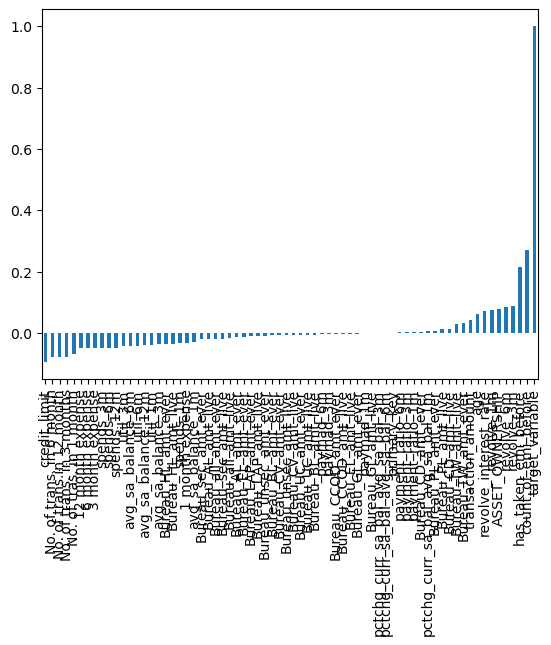

In [21]:
data.corr()['target_variable'].sort_values().plot.bar()

**I will be dropping the columns which are having very less correlation**

In [446]:
data.drop(data.iloc[:,24:54],axis=1,inplace=True)
data.drop(['paymad_6m','paymad_3m','paymad_1m','payment_ratio_1m','payment_ratio_3m','payment_ratio_6m','pctchg_curr_sa_bal_avg_sa_bal_1m','pctchg_curr_sa_bal_avg_sa_bal_3m','pctchg_curr_sa_bal_avg_sa_bal_6m'],axis=1,inplace=True)
data.shape

(50000, 31)

<AxesSubplot:>

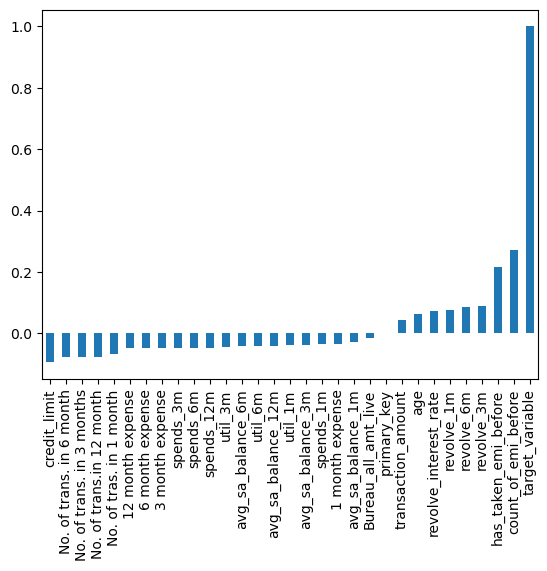

In [448]:
data.corr()['target_variable'].sort_values().plot.bar()

In [1]:
data['new_age']=data['age']*(-1)
scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))data['new_age']
data

SyntaxError: invalid syntax (3038142451.py, line 2)

In [450]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
model = scaler.fit(data.drop(['target_variable','primary_key'],axis=1))
scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))scaled_data = model.transform(data.drop(['target_variable','primary_key'],axis=1))

SyntaxError: invalid syntax (2411484564.py, line 4)

In [451]:
scaled_data.shape

(30000, 310)

**I will be using Principal Component Analysis for reducing these large number of features**

In [452]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(scaled_data)
df_pca=pca.transform(scaled_data)
df_pca=pd.DataFrame(df_pca,columns=['P1','P2','P3'])
print(df_pca)

             P1        P2        P3
0      2.191527 -3.441738  1.351773
1     -0.561117  1.877488 -0.104677
2     -0.522657  1.921009 -0.147037
3     -0.565175  1.872896 -0.100208
4     -1.633267  2.611682  0.950612
...         ...       ...       ...
29995 -2.311279  2.022568 -0.114873
29996 -0.640922 -0.106557  0.301190
29997 -1.798339  1.832091 -0.901046
29998  5.925039  0.224151  0.316967
29999 -1.818398  2.714083  0.057158

[30000 rows x 3 columns]


In [453]:
df_pca['target_value']=data['target_variable']

In [454]:
df_pca['primary_key']=data['primary_key']

In [455]:
df_pca # this is our new dataframe

,P1,P2,P3,target_value,primary_key
0,2.191527,-3.441738,1.351773,0,49099894
1,-0.561117,1.877488,-0.104677,0,45954931
2,-0.522657,1.921009,-0.147037,0,44992070
3,-0.565175,1.872896,-0.100208,0,44823072
4,-1.633267,2.611682,0.950612,0,49088796
...,...,...,...,...,...
29995,-2.311279,2.022568,-0.114873,0,47006350
29996,-0.640922,-0.106557,0.301190,1,46266802
29997,-1.798339,1.832091,-0.901046,1,48081929
29998,5.925039,0.224151,0.316967,0,44983358


**Using Logistic Regression as our model**

In [456]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split( df_pca.drop(['primary_key','target_value'],axis=1),df_pca['target_value'], test_size=0.33, random_state=101)

In [457]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [458]:
y_pred=log_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9484848484848485


**Very high accuracy something seems off!**

In [461]:
print(confusion_matrix(y_test, y_pred))

[[9390    0]
 [ 510    0]]


**Now the problem arises the false negative in the confusion matrix is zero, due to which the recall become 1. We don't want
this**
**This may be simply due to the unbalanced dataset so we need balance our dataset**

In [462]:
#X = data.drop('target_variable', axis=1)
#y = data['target_variable']

# count the number of samples in each class
class_count_0, class_count_1 = data['target_variable'].value_counts()

# separate samples from each class
class_0 = data[data['target_variable'] == 0]
class_1 = data[data['target_variable'] == 1]

# undersample the majority class
class_0_undersampled = class_0.sample(class_count_1, random_state=42)

# concatenate the two classes
undersampled_data = pd.concat([class_0_undersampled, class_1], axis=0)

# shuffle the data
undersampled_data = undersampled_data.sample(frac=1, random_state=42)

# separate features and target variable of the undersampled data
X_resampled = undersampled_data.drop('target_variable', axis=1)
y_resampled = undersampled_data['target_variable']

# print the new class distribution
print(pd.Series(y_resampled).value_counts())

1    2620
0    2620
Name: target_variable, dtype: int64


**Now our data is perfectly balanced, So we need to apply the model again**

In [463]:
undersampled_data = undersampled_data.reset_index()
undersampled_data.tail()
undersampled_data.drop('index',axis =1)

,primary_key,transaction_amount,target_variable,revolve_interest_rate,credit_limit,spends_1m,spends_3m,spends_6m,spends_12m,revolve_1m,...,avg_sa_balance_6m,avg_sa_balance_12m,No. of tras. in 1 month,1 month expense,No. of trans. in 3 months,3 month expense,No. of trans. in 6 month,6 month expense,No. of trans.in 12 month,12 month expense
0,46239179,36100.00,1,28.0,125000.0,75361.00,78490.00,78490.00,78490.00,0.0,...,7.119278e+03,7.119278e+03,3,75361.00,4,78490.00,4,78490.00,4,78490.00
1,48476837,3714.00,1,36.0,336000.0,4724.76,15770.40,15770.40,15770.40,1.0,...,3.766639e+04,1.399934e+05,2,4724.76,14,15770.40,14,15770.40,14,15770.40
2,44949719,3089.00,0,9.0,55000.0,6051.26,36625.64,36625.64,36625.64,0.0,...,2.072410e+04,1.662714e+04,4,6051.26,13,36625.64,13,36625.64,13,36625.64
3,44186927,4855.10,1,9.0,44000.0,25375.66,49923.05,49923.05,49923.05,0.0,...,7.614334e+02,1.026092e+03,13,25375.66,33,49923.05,33,49923.05,33,49923.05
4,46088927,50000.00,0,36.0,450000.0,78692.73,304058.12,304058.12,304058.12,0.0,...,3.968049e+05,4.359796e+05,10,78692.73,33,304058.12,33,304058.12,33,304058.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,46888910,10150.00,1,9.0,67000.0,15247.50,35567.50,35567.50,35567.50,0.0,...,1.960000e+01,1.924365e+01,2,15247.50,3,35567.50,3,35567.50,3,35567.50
5236,43776785,50650.00,1,33.0,99000.0,50650.00,50650.00,50650.00,50650.00,0.0,...,2.350608e+04,5.439601e+04,1,50650.00,1,50650.00,1,50650.00,1,50650.00
5237,46239160,5034.00,1,20.0,500000.0,33683.25,42292.57,42292.57,42292.57,0.0,...,9.259203e+05,4.677552e+05,29,33683.25,45,42292.57,45,42292.57,45,42292.57
5238,43717604,5000.00,1,34.0,30000.0,8817.70,13943.70,13943.70,13943.70,0.0,...,1.626437e-02,1.057210e+02,5,8817.70,9,13943.70,9,13943.70,9,13943.70


In [464]:
undersampled_data['primary_key']

0       46239179
1       48476837
2       44949719
3       44186927
4       46088927
          ...   
5235    46888910
5236    43776785
5237    46239160
5238    43717604
5239    44184194
Name: primary_key, Length: 5240, dtype: int64

**Scaling the data using Standard Scaler**

In [465]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
model2 = scaler.fit(undersampled_data.drop(['target_variable','primary_key'],axis=1))
scaled_data2 = model2.transform(undersampled_data.drop(['target_variable','primary_key'],axis=1))
scaled_data2.shape
scaled_data2

array([[ 0.58539234,  0.75685005,  0.18645681, ..., -0.13273637,
        -0.62183265, -0.13273637],
       [ 0.5296855 , -0.49913188,  1.10853467, ..., -0.26801697,
        -0.36724803, -0.26801697],
       [ 0.17484341, -0.5233704 , -2.0034781 , ..., -0.22303407,
        -0.39270649, -0.22303407],
       ...,
       [ 1.63702547, -0.44794012, -0.73562104, ..., -0.21081101,
         0.42196429, -0.21081101],
       [ 1.69602568, -0.4492587 ,  0.87801521, ..., -0.271957  ,
        -0.49454034, -0.271957  ],
       [-0.0208663 ,  0.59150689, -0.73562104, ...,  0.09799955,
         0.26921352,  0.09799955]])

In [466]:
# from sklearn.decomposition import PCA and for this time i am using 7 principle components.
pca=PCA(n_components=7)
pca.fit(scaled_data2)
df_pca2=pca.transform(scaled_data2)
df_pca2=pd.DataFrame(df_pca2,columns=['P1','P2','P3','P4','P5','P6','P7'])
df_pca2

,P1,P2,P3,P4,P5,P6,P7
0,-0.781557,0.891457,-1.626716,-1.044149,-0.173055,-0.049608,-0.169044
1,-1.257967,-1.590344,1.670695,-0.776848,4.382663,-0.304957,0.437447
2,-0.863052,-2.814515,2.788969,-0.304739,-1.998165,-1.489587,-0.508590
3,-0.521829,-0.344891,0.121455,0.632679,0.343472,1.026088,1.672702
4,0.972232,1.090103,-1.052777,-0.314733,-0.031830,-0.838446,0.816893
...,...,...,...,...,...,...,...
5235,-1.232214,-0.443773,-0.071742,-0.768322,1.496982,1.237905,2.138806
5236,-1.100976,0.511105,-1.400446,-1.394282,0.677363,0.902926,0.765511
5237,0.228489,2.221625,-0.577691,1.546166,0.701362,-2.121307,0.569305
5238,-1.265814,0.849322,-1.529309,-0.387990,-0.125282,0.593531,-0.324628


In [467]:
df_pca2['target_value']= undersampled_data['target_variable']
df_pca2['primary_key']= undersampled_data['primary_key']
df_pca2

,P1,P2,P3,P4,P5,P6,P7,target_value,primary_key
0,-0.781557,0.891457,-1.626716,-1.044149,-0.173055,-0.049608,-0.169044,1,46239179
1,-1.257967,-1.590344,1.670695,-0.776848,4.382663,-0.304957,0.437447,1,48476837
2,-0.863052,-2.814515,2.788969,-0.304739,-1.998165,-1.489587,-0.508590,0,44949719
3,-0.521829,-0.344891,0.121455,0.632679,0.343472,1.026088,1.672702,1,44186927
4,0.972232,1.090103,-1.052777,-0.314733,-0.031830,-0.838446,0.816893,0,46088927
...,...,...,...,...,...,...,...,...,...
5235,-1.232214,-0.443773,-0.071742,-0.768322,1.496982,1.237905,2.138806,1,46888910
5236,-1.100976,0.511105,-1.400446,-1.394282,0.677363,0.902926,0.765511,1,43776785
5237,0.228489,2.221625,-0.577691,1.546166,0.701362,-2.121307,0.569305,1,46239160
5238,-1.265814,0.849322,-1.529309,-0.387990,-0.125282,0.593531,-0.324628,1,43717604


**Now we are all set with our dataset, Now we can apply the models and do prediction**

In [468]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( df_pca2.drop(['primary_key','target_value'],axis=1),df_pca2['target_value'], test_size=0.33, random_state=101)

In [469]:
# from this time i will be using both svm and logistic regression see some comparison.
svm.fit(X_train2,y_train2)
y_pred2=svm.predict(X_test2)
acc2=accuracy_score(y_test2,y_pred2)
print(acc2)

0.7780346820809249


In [470]:
log_model2=LogisticRegression()
log_model2.fit(X_train2,y_train2)

LogisticRegression()

In [471]:
y_pred2=log_model2.predict(X_test2)
accuracy2=accuracy_score(y_test2,y_pred2)
print(accuracy2)

0.7630057803468208


**Accuracy seems to be pretty good**

In [281]:
y_prob=svm.predict_proba(X_test2)
y_prob.shape

(1730, 2)

**Now printing the probability of pridiction**

In [282]:
pred_prob=pd.DataFrame(y_prob)

In [283]:
pred_prob

,0,1
0,0.299874,0.700126
1,0.584265,0.415735
2,0.330592,0.669408
3,0.283563,0.716437
4,0.133410,0.866590
...,...,...
1725,0.631700,0.368300
1726,0.770787,0.229213
1727,0.256413,0.743587
1728,0.567482,0.432518


## Note this section of code contains the prediction that we need to submit for the competetion. so it is ok if you don't follow this.

**Preprocessing the data for testing**

In [387]:
val_data=pd.read_csv('case_study_validation.csv')
val_data

,primary_key,transaction_amount,merchant_name,merchant_country,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,43231676,88258.14,MARRLOTT SURAT,IN,Hotels,9.0,288000.0,0,0,0,...,NaN,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card
1,44150123,8891.30,TEXAS INSTRUMENTS,IN,Retail,22.0,97000.0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
2,48126804,60000.00,ADITYA BIRLA SUN LIFE,IN,Insurance,22.0,97000.0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44577506,3499.00,ROBU,IN,Retail,22.0,97000.0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,45463164,21358.00,RAZ*ICICI LOMBARD GIC L,IN,Insurance,24.0,25000.0,0,0,0,...,NaN,NaN,36872.317040,72868.288940,41375.095170,24675.827510,0.498606,5.450048,3.588329,Mass_Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44997899,3352.00,KARNATAKA STATE ROAD T,IN,Transportation services,36.0,86000.0,0,0,0,...,NaN,NaN,4297.260000,5949.096588,7274.645057,7684.524006,-0.419799,-0.303435,-0.102423,Youth_Card
29996,46270879,20000.00,CHRISTIAN MEDICAL COLL,IN,Medical,9.0,85000.0,0,0,0,...,NaN,392736.0,838.863704,1878.863529,2548.536782,36357.501490,-0.652264,-0.410666,-0.963261,Youth_Card
29997,45935649,5000.00,EBS ECOMMERCE,IN,Utility,36.0,30000.0,0,0,0,...,NaN,7200.0,0.000000,0.188235,9536.264713,38265.972700,NaN,-0.999990,-0.848254,Youth_Card
29998,43101362,9601.28,LIFE INSURANCE CORPORA,IN,Insurance,9.0,281000.0,0,0,0,...,7500000.0,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card


In [388]:
val_data['No. of tras. in 1 month']=val_data.iloc[:,7:41].sum(axis=1)
val_data

,primary_key,transaction_amount,merchant_name,merchant_country,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,...,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product,No. of tras. in 1 month
0,43231676,88258.14,MARRLOTT SURAT,IN,Hotels,9.0,288000.0,0,0,0,...,3500000.0,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card,8
1,44150123,8891.30,TEXAS INSTRUMENTS,IN,Retail,22.0,97000.0,0,0,0,...,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9
2,48126804,60000.00,ADITYA BIRLA SUN LIFE,IN,Insurance,22.0,97000.0,0,0,0,...,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9
3,44577506,3499.00,ROBU,IN,Retail,22.0,97000.0,0,0,0,...,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9
4,45463164,21358.00,RAZ*ICICI LOMBARD GIC L,IN,Insurance,24.0,25000.0,0,0,0,...,NaN,36872.317040,72868.288940,41375.095170,24675.827510,0.498606,5.450048,3.588329,Mass_Card,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44997899,3352.00,KARNATAKA STATE ROAD T,IN,Transportation services,36.0,86000.0,0,0,0,...,NaN,4297.260000,5949.096588,7274.645057,7684.524006,-0.419799,-0.303435,-0.102423,Youth_Card,2
29996,46270879,20000.00,CHRISTIAN MEDICAL COLL,IN,Medical,9.0,85000.0,0,0,0,...,392736.0,838.863704,1878.863529,2548.536782,36357.501490,-0.652264,-0.410666,-0.963261,Youth_Card,16
29997,45935649,5000.00,EBS ECOMMERCE,IN,Utility,36.0,30000.0,0,0,0,...,7200.0,0.000000,0.188235,9536.264713,38265.972700,NaN,-0.999990,-0.848254,Youth_Card,9
29998,43101362,9601.28,LIFE INSURANCE CORPORA,IN,Insurance,9.0,281000.0,0,0,0,...,8073963.0,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card,26


In [389]:
val_data['1 month expense']=val_data.iloc[:,41:77].sum(axis=1)
val_data

,primary_key,transaction_amount,merchant_name,merchant_country,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,...,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product,No. of tras. in 1 month,1 month expense
0,43231676,88258.14,MARRLOTT SURAT,IN,Hotels,9.0,288000.0,0,0,0,...,38758.460000,64367.369410,113262.353300,160922.632200,-0.168474,-0.597603,-0.445636,Affluent_Card,8,229060.22
1,44150123,8891.30,TEXAS INSTRUMENTS,IN,Retail,22.0,97000.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9,188364.72
2,48126804,60000.00,ADITYA BIRLA SUN LIFE,IN,Insurance,22.0,97000.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9,188364.72
3,44577506,3499.00,ROBU,IN,Retail,22.0,97000.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9,188364.72
4,45463164,21358.00,RAZ*ICICI LOMBARD GIC L,IN,Insurance,24.0,25000.0,0,0,0,...,36872.317040,72868.288940,41375.095170,24675.827510,0.498606,5.450048,3.588329,Mass_Card,2,42165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44997899,3352.00,KARNATAKA STATE ROAD T,IN,Transportation services,36.0,86000.0,0,0,0,...,4297.260000,5949.096588,7274.645057,7684.524006,-0.419799,-0.303435,-0.102423,Youth_Card,2,6400.00
29996,46270879,20000.00,CHRISTIAN MEDICAL COLL,IN,Medical,9.0,85000.0,0,0,0,...,838.863704,1878.863529,2548.536782,36357.501490,-0.652264,-0.410666,-0.963261,Youth_Card,16,59046.96
29997,45935649,5000.00,EBS ECOMMERCE,IN,Utility,36.0,30000.0,0,0,0,...,0.000000,0.188235,9536.264713,38265.972700,NaN,-0.999990,-0.848254,Youth_Card,9,20047.24
29998,43101362,9601.28,LIFE INSURANCE CORPORA,IN,Insurance,9.0,281000.0,0,0,0,...,25464.667410,27062.142350,18996.808050,45322.080280,-0.000305,1.396160,-0.671141,Affluent_Card,26,119644.39


In [391]:
val_data['No. of trans. in 3 months']=val_data.iloc[:,77:112].sum(axis=1)
val_data.head(100)

,primary_key,transaction_amount,merchant_name,merchant_country,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,...,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product,No. of tras. in 1 month,1 month expense,No. of trans. in 3 months
0,43231676,88258.14,MARRLOTT SURAT,IN,Hotels,9.0,288000.0,0,0,0,...,64367.36941,113262.35330,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card,8,229060.22,24
1,44150123,8891.30,TEXAS INSTRUMENTS,IN,Retail,22.0,97000.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9,188364.72,15
2,48126804,60000.00,ADITYA BIRLA SUN LIFE,IN,Insurance,22.0,97000.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9,188364.72,15
3,44577506,3499.00,ROBU,IN,Retail,22.0,97000.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card,9,188364.72,15
4,45463164,21358.00,RAZ*ICICI LOMBARD GIC L,IN,Insurance,24.0,25000.0,0,0,0,...,72868.28894,41375.09517,24675.82751,0.498606,5.450048,3.588329,Mass_Card,2,42165.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45164823,22699.00,AMAZON PAY,IN,Retail,26.0,174000.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Affluent_Card,11,348339.68,12
96,48311891,87902.00,AMAN ENTERPRISE,IN,Dept stores,26.0,174000.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Affluent_Card,11,348339.68,12
97,47021097,25000.00,PAY*Mahalaxmi Bangle Pl,IN,Retail,34.0,103000.0,0,0,0,...,41058.09565,34165.12333,49741.69964,-0.323793,0.488586,-0.460912,Mass_Card,2,50000.00,3
98,45476021,2500.00,SENCE SPA,IN,Misc Services,34.0,162000.0,0,0,0,...,452853.83450,342956.44240,321902.84940,1.042971,0.902761,0.178064,Affluent_Card,3,10274.06,27


In [392]:
val_data['3 month expense']=val_data.iloc[:,112:147].sum(axis=1)

In [393]:
val_data['No. of trans. in 6 month']=val_data.iloc[:,147:182].sum(axis=1)

In [394]:
val_data['6 month expense']=val_data.iloc[:,182:217].sum(axis=1)


In [395]:
val_data['No. of trans.in 12 month']=val_data.iloc[:,217:252].sum(axis=1)


In [396]:
val_data['12 month expense']=val_data.iloc[:,252:287].sum(axis=1)


In [397]:
val_data.head(10)

,primary_key,transaction_amount,merchant_name,merchant_country,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,...,pctchg_curr_sa_bal_avg_sa_bal_6m,product,No. of tras. in 1 month,1 month expense,No. of trans. in 3 months,3 month expense,No. of trans. in 6 month,6 month expense,No. of trans.in 12 month,12 month expense
0,43231676,88258.14,MARRLOTT SURAT,IN,Hotels,9.0,288000.0,0,0,0,...,-0.445636,Affluent_Card,8,229060.22,24,512274.82,24,512274.82,24,512274.82
1,44150123,8891.30,TEXAS INSTRUMENTS,IN,Retail,22.0,97000.0,0,0,0,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38
2,48126804,60000.00,ADITYA BIRLA SUN LIFE,IN,Insurance,22.0,97000.0,0,0,0,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38
3,44577506,3499.00,ROBU,IN,Retail,22.0,97000.0,0,0,0,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38
4,45463164,21358.00,RAZ*ICICI LOMBARD GIC L,IN,Insurance,24.0,25000.0,0,0,0,...,3.588329,Mass_Card,2,42165.00,3,62198.00,3,62198.00,3,62198.00
5,43608070,3541.25,Dreamplug Technologies Pv,IN,Rent Payments,9.0,200000.0,0,0,0,...,NaN,Affluent_Card,2,20739.25,2,20739.25,2,20739.25,2,20739.25
6,43571777,100000.00,A AND G FURNITURE PALA,IN,Home furnishing,32.0,291000.0,0,0,0,...,NaN,Affluent_Card,4,100078.00,8,102644.17,8,102644.17,8,102644.17
7,44385232,10230.00,PAYTM WALLET,IN,Wallet load,36.0,107000.0,0,0,0,...,-0.374627,Youth_Card,13,14025.40,18,15886.09,18,15886.09,18,15886.09
8,44990188,5159.00,SARAVANA STORES CELEBR,IN,Electronics,30.0,276000.0,0,0,0,...,2.528094,Affluent_Card,13,71555.67,76,132478.62,76,132478.62,76,132478.62
9,45328676,9292.00,SARAVANA STORES CELEBR,IN,Electronics,30.0,276000.0,0,0,0,...,2.528094,Affluent_Card,13,71555.67,76,132478.62,76,132478.62,76,132478.62


In [399]:
val_data.drop(val_data.iloc[:,7:287],axis=1,inplace=True)
val_data

,primary_key,transaction_amount,merchant_name,merchant_country,Merchant_category,revolve_interest_rate,credit_limit,spends_1m,spends_3m,spends_12m,...,pctchg_curr_sa_bal_avg_sa_bal_6m,product,No. of tras. in 1 month,1 month expense,No. of trans. in 3 months,3 month expense,No. of trans. in 6 month,6 month expense,No. of trans.in 12 month,12 month expense
0,43231676,88258.14,MARRLOTT SURAT,IN,Hotels,9.0,288000.0,229060.22,512274.82,512274.82,...,-0.445636,Affluent_Card,8,229060.22,24,512274.82,24,512274.82,24,512274.82
1,44150123,8891.30,TEXAS INSTRUMENTS,IN,Retail,22.0,97000.0,188364.72,252317.38,252317.38,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38
2,48126804,60000.00,ADITYA BIRLA SUN LIFE,IN,Insurance,22.0,97000.0,188364.72,252317.38,252317.38,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38
3,44577506,3499.00,ROBU,IN,Retail,22.0,97000.0,188364.72,252317.38,252317.38,...,NaN,Mass_Card,9,188364.72,15,252317.38,15,252317.38,15,252317.38
4,45463164,21358.00,RAZ*ICICI LOMBARD GIC L,IN,Insurance,24.0,25000.0,42165.00,62198.00,62198.00,...,3.588329,Mass_Card,2,42165.00,3,62198.00,3,62198.00,3,62198.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44997899,3352.00,KARNATAKA STATE ROAD T,IN,Transportation services,36.0,86000.0,6400.00,6400.00,6400.00,...,-0.102423,Youth_Card,2,6400.00,2,6400.00,2,6400.00,2,6400.00
29996,46270879,20000.00,CHRISTIAN MEDICAL COLL,IN,Medical,9.0,85000.0,59046.96,93677.27,93677.27,...,-0.963261,Youth_Card,16,59046.96,36,93677.27,36,93677.27,36,93677.27
29997,45935649,5000.00,EBS ECOMMERCE,IN,Utility,36.0,30000.0,20045.24,46012.64,46012.64,...,-0.848254,Youth_Card,9,20047.24,20,46012.64,20,46012.64,20,46012.64
29998,43101362,9601.28,LIFE INSURANCE CORPORA,IN,Insurance,9.0,281000.0,119644.39,480323.25,480323.25,...,-0.671141,Affluent_Card,26,119644.39,94,480323.25,94,480323.25,94,480323.25


In [400]:
val_data.drop(['merchant_name','product','Merchant_category','married_flag','merchant_country'],axis=1,inplace=True)
val_data=val_data.fillna(0)


In [401]:
val_data.drop(val_data.iloc[:,24:54],axis=1,inplace=True)

In [402]:
val_data.drop(['paymad_6m','paymad_3m','paymad_1m','payment_ratio_1m','payment_ratio_3m','payment_ratio_6m','pctchg_curr_sa_bal_avg_sa_bal_1m','pctchg_curr_sa_bal_avg_sa_bal_3m','pctchg_curr_sa_bal_avg_sa_bal_6m'],axis=1,inplace=True)
val_data['new_age']=val_data['age']*(-1)
val_data

,primary_key,transaction_amount,revolve_interest_rate,credit_limit,spends_1m,spends_3m,spends_12m,revolve_1m,revolve_3m,revolve_6m,...,avg_sa_balance_12m,No. of tras. in 1 month,1 month expense,No. of trans. in 3 months,3 month expense,No. of trans. in 6 month,6 month expense,No. of trans.in 12 month,12 month expense,new_age
0,43231676,88258.14,9.0,288000.0,229060.22,512274.82,512274.82,0.0,0.0,0.0,...,160922.632200,8,229060.22,24,512274.82,24,512274.82,24,512274.82,26.438172
1,44150123,8891.30,22.0,97000.0,188364.72,252317.38,252317.38,0.0,0.0,0.0,...,0.000000,9,188364.72,15,252317.38,15,252317.38,15,252317.38,29.857527
2,48126804,60000.00,22.0,97000.0,188364.72,252317.38,252317.38,0.0,0.0,0.0,...,0.000000,9,188364.72,15,252317.38,15,252317.38,15,252317.38,29.857527
3,44577506,3499.00,22.0,97000.0,188364.72,252317.38,252317.38,0.0,0.0,0.0,...,0.000000,9,188364.72,15,252317.38,15,252317.38,15,252317.38,29.857527
4,45463164,21358.00,24.0,25000.0,42165.00,62198.00,62198.00,0.0,0.0,0.0,...,24675.827510,2,42165.00,3,62198.00,3,62198.00,3,62198.00,36.876344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44997899,3352.00,36.0,86000.0,6400.00,6400.00,6400.00,0.0,0.0,0.0,...,7684.524006,2,6400.00,2,6400.00,2,6400.00,2,6400.00,24.586022
29996,46270879,20000.00,9.0,85000.0,59046.96,93677.27,93677.27,0.0,0.0,0.0,...,36357.501490,16,59046.96,36,93677.27,36,93677.27,36,93677.27,36.604839
29997,45935649,5000.00,36.0,30000.0,20045.24,46012.64,46012.64,0.0,0.0,0.0,...,38265.972700,9,20047.24,20,46012.64,20,46012.64,20,46012.64,30.626344
29998,43101362,9601.28,9.0,281000.0,119644.39,480323.25,480323.25,0.0,0.0,1.0,...,45322.080280,26,119644.39,94,480323.25,94,480323.25,94,480323.25,44.080645


In [403]:
model2 = scaler.fit(val_data.drop('primary_key',axis=1))
scaled_data3 = model2.transform(val_data.drop('primary_key',axis=1))

In [404]:
pca=PCA(n_components=7)
pca.fit(scaled_data3)
df_pca3=pca.transform(scaled_data3)
df_pca3=pd.DataFrame(df_pca3,columns=['P1','P2','P3','P4','P5','P6','P7'])
df_pca3

,P1,P2,P3,P4,P5,P6,P7
0,1.385239,-0.672795,-0.815157,-1.294434,1.683418,-0.554994,-0.561016
1,0.145042,-2.349857,-0.230292,-0.596251,2.396192,-1.172845,0.343493
2,0.238515,-2.387068,-0.270938,-0.984648,2.567990,-1.332948,0.551635
3,0.135180,-2.345931,-0.226004,-0.555272,2.378066,-1.155953,0.321533
4,-1.371861,0.645804,-1.228515,-0.837838,-0.608764,1.302126,0.838919
...,...,...,...,...,...,...,...
29995,-1.730355,0.247087,-1.738413,-0.416575,0.863494,1.751679,-0.646105
29996,-0.402409,-0.418103,-0.193213,0.354467,-0.208718,1.213171,1.996674
29997,-1.119851,-1.505544,-0.513986,0.029811,0.861371,1.224717,1.891685
29998,2.292272,0.125521,0.768519,1.583225,-1.080176,-0.811360,-0.838046


In [406]:
df_pca3['primary_key']= val_data['primary_key']
df_pca3

,P1,P2,P3,P4,P5,P6,P7,primary_key
0,1.385239,-0.672795,-0.815157,-1.294434,1.683418,-0.554994,-0.561016,43231676
1,0.145042,-2.349857,-0.230292,-0.596251,2.396192,-1.172845,0.343493,44150123
2,0.238515,-2.387068,-0.270938,-0.984648,2.567990,-1.332948,0.551635,48126804
3,0.135180,-2.345931,-0.226004,-0.555272,2.378066,-1.155953,0.321533,44577506
4,-1.371861,0.645804,-1.228515,-0.837838,-0.608764,1.302126,0.838919,45463164
...,...,...,...,...,...,...,...,...
29995,-1.730355,0.247087,-1.738413,-0.416575,0.863494,1.751679,-0.646105,44997899
29996,-0.402409,-0.418103,-0.193213,0.354467,-0.208718,1.213171,1.996674,46270879
29997,-1.119851,-1.505544,-0.513986,0.029811,0.861371,1.224717,1.891685,45935649
29998,2.292272,0.125521,0.768519,1.583225,-1.080176,-0.811360,-0.838046,43101362


In [412]:
#df_pca2.drop(['primary_key','target_value'],axis=1
y_pred3=svm.predict(df_pca3.drop('primary_key',axis=1))
y_pred3

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [413]:
y_prob3=svm.predict_proba(df_pca3.drop('primary_key',axis=1))

In [417]:
y_prob3[:,1]

array([0.17039627, 0.27451092, 0.24935495, ..., 0.93394935, 0.11524081,
       0.73839432])

In [424]:
final=pd.DataFrame(y_prob3[:,1],columns=['prob'])
final['primary_key']=df_pca3['primary_key']
final.to_csv(final_result.csv')